# Hyperparameter Tuning - Batch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from numpy import asarray
from sklearn.metrics import mean_absolute_error

In [2]:
"""
Resource 1
"""

def create_model(n, optimizer, dropout_rate):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(n,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])
    
    return model

### Splitting the Data - from feature selection model mutual_info_regression

In [3]:
# Mutual Info Regression
y = pd.read_csv('y.csv')
x2_mutualinforegression = pd.read_csv('x2_mutualinforegression.csv')
n = len(x2_mutualinforegression.columns)
X_train, X_test, y_train, y_test = train_test_split(x2_mutualinforegression, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, n

((728, 16), (182, 16), 16)

## Batch Size
Testing batch sizes: 1, 5, 10, 20 

### Batch size = 1

In [46]:
"""
Resource 2
"""
model_batch1 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_batch1 = model_batch1.fit(X_train, y_train,
                                  validation_split = 0.2,
                                  epochs=200,
                                  batch_size=1,
                                  verbose=1
                                 )

Epoch 1/200
582/582 [==============================] - 3s 3ms/step - loss: 910.6884 - mae: 6.1887 - val_loss: 820.5618 - val_mae: 7.5894

Epoch 00001: val_loss improved from inf to 820.56183, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
582/582 [==============================] - 2s 3ms/step - loss: 897.1742 - mae: 6.1420 - val_loss: 791.0219 - val_mae: 7.4675

Epoch 00002: val_loss improved from 820.56183 to 791.02185, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
582/582 [==============================] - 2s 4ms/step - loss: 862.1638 - mae: 6.0961 - val_loss: 747.5722 - val_mae: 7.3113

Epoch 00003: val_loss improved from 791.02185 to 747.57220, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
582/582 [==============================] - 2s 4ms/step - loss: 827.7418 - mae: 6.0485 - val_loss: 699.7094 - val

582/582 [==============================] - 1s 2ms/step - loss: 41.0888 - mae: 1.9584 - val_loss: 359.3096 - val_mae: 3.8499

Epoch 00074: val_loss did not improve from 153.97298
Epoch 75/200
582/582 [==============================] - 1s 3ms/step - loss: 50.2111 - mae: 1.9696 - val_loss: 425.6962 - val_mae: 4.1416

Epoch 00075: val_loss did not improve from 153.97298
Epoch 76/200
582/582 [==============================] - 2s 3ms/step - loss: 41.2615 - mae: 1.8274 - val_loss: 314.7724 - val_mae: 3.6806

Epoch 00076: val_loss did not improve from 153.97298
Epoch 77/200
582/582 [==============================] - 2s 3ms/step - loss: 30.1865 - mae: 1.6130 - val_loss: 298.4135 - val_mae: 3.6215

Epoch 00077: val_loss did not improve from 153.97298
Epoch 78/200
582/582 [==============================] - 1s 3ms/step - loss: 41.2628 - mae: 1.9243 - val_loss: 314.4319 - val_mae: 3.6017

Epoch 00078: val_loss did not improve from 153.97298
Epoch 79/200
582/582 [==============================] - 1s

582/582 [==============================] - 2s 3ms/step - loss: 39.2120 - mae: 1.8318 - val_loss: 257.0205 - val_mae: 3.3787

Epoch 00117: val_loss did not improve from 153.97298
Epoch 118/200
582/582 [==============================] - 2s 4ms/step - loss: 45.7184 - mae: 1.8503 - val_loss: 363.8953 - val_mae: 3.9188

Epoch 00118: val_loss did not improve from 153.97298
Epoch 119/200
582/582 [==============================] - 2s 4ms/step - loss: 34.6097 - mae: 1.7179 - val_loss: 353.1225 - val_mae: 3.8594

Epoch 00119: val_loss did not improve from 153.97298
Epoch 120/200
582/582 [==============================] - 2s 4ms/step - loss: 31.7101 - mae: 1.7273 - val_loss: 303.6187 - val_mae: 3.6395

Epoch 00120: val_loss did not improve from 153.97298
Epoch 121/200
582/582 [==============================] - 2s 3ms/step - loss: 28.1704 - mae: 1.7201 - val_loss: 257.7924 - val_mae: 3.4195

Epoch 00121: val_loss did not improve from 153.97298
Epoch 122/200
582/582 [==============================]

582/582 [==============================] - 1s 3ms/step - loss: 25.4050 - mae: 1.5861 - val_loss: 261.2291 - val_mae: 3.4718

Epoch 00160: val_loss did not improve from 153.97298
Epoch 161/200
582/582 [==============================] - 2s 3ms/step - loss: 26.1902 - mae: 1.4518 - val_loss: 339.0583 - val_mae: 3.8430

Epoch 00161: val_loss did not improve from 153.97298
Epoch 162/200
582/582 [==============================] - 2s 3ms/step - loss: 24.9032 - mae: 1.5482 - val_loss: 400.5354 - val_mae: 4.0591

Epoch 00162: val_loss did not improve from 153.97298
Epoch 163/200
582/582 [==============================] - 1s 2ms/step - loss: 25.0877 - mae: 1.5468 - val_loss: 265.3753 - val_mae: 3.3917

Epoch 00163: val_loss did not improve from 153.97298
Epoch 164/200
582/582 [==============================] - 1s 2ms/step - loss: 25.3857 - mae: 1.5251 - val_loss: 234.4021 - val_mae: 3.2269

Epoch 00164: val_loss did not improve from 153.97298
Epoch 165/200
582/582 [==============================]

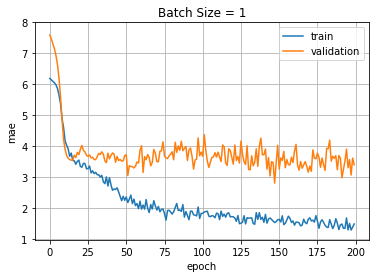

6/6 [==============================] - 0s 6ms/step - loss: 112.0690 - mae: 2.1908


[112.06901550292969, 2.1908044815063477]

In [47]:
plt.plot(history_batch1.history['mae'])
plt.plot(history_batch1.history['val_mae'])
plt.title('Batch Size = 1')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_batch1 = model_batch1.evaluate(X_test, y_test, verbose=1)
score_batch1

### Batch size = 2

In [48]:
"""
Resource 2
"""
model_batch2 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_batch2 = model_batch2.fit(X_train,
                                  y_train,
                                  validation_split = 0.2,
                                  epochs=200,
                                  batch_size=2,
                                  verbose=1
                                 )

Epoch 1/200
291/291 [==============================] - 3s 6ms/step - loss: 910.6235 - mae: 6.2195 - val_loss: 823.1181 - val_mae: 7.6210

Epoch 00001: val_loss improved from inf to 823.11810, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
291/291 [==============================] - 1s 4ms/step - loss: 896.5704 - mae: 6.1212 - val_loss: 808.8908 - val_mae: 7.5309

Epoch 00002: val_loss improved from 823.11810 to 808.89081, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
291/291 [==============================] - 1s 4ms/step - loss: 889.0598 - mae: 6.0823 - val_loss: 795.1710 - val_mae: 7.4628

Epoch 00003: val_loss improved from 808.89081 to 795.17102, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
291/291 [==============================] - 1s 4ms/step - loss: 871.5646 - mae: 6.0594 - val_loss: 776.8678 - val

291/291 [==============================] - 1s 3ms/step - loss: 193.4613 - mae: 3.2601 - val_loss: 175.6994 - val_mae: 3.6968

Epoch 00031: val_loss did not improve from 169.61331
Epoch 32/200
291/291 [==============================] - 1s 3ms/step - loss: 180.3164 - mae: 3.2640 - val_loss: 178.2278 - val_mae: 3.7505

Epoch 00032: val_loss did not improve from 169.61331
Epoch 33/200
291/291 [==============================] - 1s 3ms/step - loss: 175.8277 - mae: 3.2158 - val_loss: 181.7293 - val_mae: 3.8002

Epoch 00033: val_loss did not improve from 169.61331
Epoch 34/200
291/291 [==============================] - 1s 3ms/step - loss: 191.3283 - mae: 3.2846 - val_loss: 184.1332 - val_mae: 3.8255

Epoch 00034: val_loss did not improve from 169.61331
Epoch 35/200
291/291 [==============================] - 1s 3ms/step - loss: 168.3580 - mae: 3.1103 - val_loss: 187.3464 - val_mae: 3.8608

Epoch 00035: val_loss did not improve from 169.61331
Epoch 36/200
291/291 [==============================]


Epoch 00073: val_loss did not improve from 169.61331
Epoch 74/200
291/291 [==============================] - 1s 3ms/step - loss: 83.4193 - mae: 2.4201 - val_loss: 218.6816 - val_mae: 3.6978

Epoch 00074: val_loss did not improve from 169.61331
Epoch 75/200
291/291 [==============================] - 1s 3ms/step - loss: 55.6938 - mae: 2.1960 - val_loss: 199.1600 - val_mae: 3.5521

Epoch 00075: val_loss did not improve from 169.61331
Epoch 76/200
291/291 [==============================] - 1s 3ms/step - loss: 78.7351 - mae: 2.2889 - val_loss: 214.6779 - val_mae: 3.6385

Epoch 00076: val_loss did not improve from 169.61331
Epoch 77/200
291/291 [==============================] - 1s 4ms/step - loss: 41.8669 - mae: 2.0361 - val_loss: 210.7554 - val_mae: 3.5930

Epoch 00077: val_loss did not improve from 169.61331
Epoch 78/200
291/291 [==============================] - 1s 3ms/step - loss: 74.3005 - mae: 2.1881 - val_loss: 186.3696 - val_mae: 3.4380

Epoch 00078: val_loss did not improve from 1

291/291 [==============================] - 1s 3ms/step - loss: 41.6556 - mae: 1.9262 - val_loss: 295.7512 - val_mae: 4.0826

Epoch 00159: val_loss did not improve from 169.61331
Epoch 160/200
291/291 [==============================] - 1s 3ms/step - loss: 35.1376 - mae: 1.8924 - val_loss: 303.6202 - val_mae: 4.0979

Epoch 00160: val_loss did not improve from 169.61331
Epoch 161/200
291/291 [==============================] - 1s 3ms/step - loss: 48.4279 - mae: 1.9810 - val_loss: 278.2078 - val_mae: 3.9673

Epoch 00161: val_loss did not improve from 169.61331
Epoch 162/200
291/291 [==============================] - 1s 3ms/step - loss: 21.4057 - mae: 1.5741 - val_loss: 251.3312 - val_mae: 3.8100

Epoch 00162: val_loss did not improve from 169.61331
Epoch 163/200
291/291 [==============================] - 1s 3ms/step - loss: 35.2123 - mae: 1.8692 - val_loss: 274.1941 - val_mae: 3.9299

Epoch 00163: val_loss did not improve from 169.61331
Epoch 164/200
291/291 [==============================]

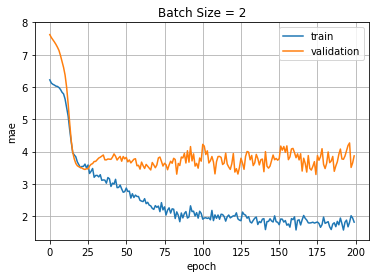

6/6 [==============================] - 0s 18ms/step - loss: 148.1457 - mae: 2.3550


[148.1457061767578, 2.35498046875]

In [49]:
"""
Resource 3
"""
plt.plot(history_batch2.history['mae'])
plt.plot(history_batch2.history['val_mae'])
plt.title('Batch Size = 2')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_batch2 = model_batch2.evaluate(X_test, y_test, verbose=1)
score_batch2

### Batch size = 5

In [52]:
"""
Resource 2
"""
model_batch5 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_batch5 = model_batch5.fit(X_train,
                                  y_train,
                                  validation_split = 0.2,
                                  epochs=200,
                                  batch_size=5,
                                  verbose=1
                                 )

Epoch 1/200
117/117 [==============================] - 3s 7ms/step - loss: 920.3821 - mae: 6.2604 - val_loss: 843.7302 - val_mae: 7.7663

Epoch 00001: val_loss improved from inf to 843.73022, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
117/117 [==============================] - 1s 5ms/step - loss: 918.3522 - mae: 6.2194 - val_loss: 840.0265 - val_mae: 7.7063

Epoch 00002: val_loss improved from 843.73022 to 840.02649, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 914.1758 - mae: 6.1743 - val_loss: 832.6183 - val_mae: 7.6460

Epoch 00003: val_loss improved from 840.02649 to 832.61829, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 906.3118 - mae: 6.1328 - val_loss: 823.8661 - val

Epoch 29/200
117/117 [==============================] - 0s 3ms/step - loss: 236.9922 - mae: 3.6438 - val_loss: 174.5204 - val_mae: 3.6990

Epoch 00029: val_loss improved from 178.48233 to 174.52037, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 30/200
117/117 [==============================] - 0s 3ms/step - loss: 227.9010 - mae: 3.6318 - val_loss: 173.0361 - val_mae: 3.6700

Epoch 00030: val_loss improved from 174.52037 to 173.03607, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 31/200
117/117 [==============================] - 1s 5ms/step - loss: 201.9829 - mae: 3.5450 - val_loss: 172.3011 - val_mae: 3.6586

Epoch 00031: val_loss improved from 173.03607 to 172.30110, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 32/200
117/117 [==============================] - 1s 5ms/step - loss: 234.4040 - mae: 3.7306 - val_loss: 173.

Epoch 69/200
117/117 [==============================] - 1s 6ms/step - loss: 129.6236 - mae: 3.0093 - val_loss: 187.3292 - val_mae: 4.0581

Epoch 00069: val_loss did not improve from 171.91129
Epoch 70/200
117/117 [==============================] - 1s 4ms/step - loss: 130.4004 - mae: 3.0248 - val_loss: 167.4085 - val_mae: 3.8401

Epoch 00070: val_loss improved from 171.91129 to 167.40854, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 71/200
117/117 [==============================] - 1s 5ms/step - loss: 108.5124 - mae: 2.7963 - val_loss: 175.3353 - val_mae: 3.9212

Epoch 00071: val_loss did not improve from 167.40854
Epoch 72/200
117/117 [==============================] - 0s 3ms/step - loss: 161.3202 - mae: 3.0363 - val_loss: 187.4841 - val_mae: 4.0341

Epoch 00072: val_loss did not improve from 167.40854
Epoch 73/200
117/117 [==============================] - 1s 6ms/step - loss: 105.6673 - mae: 2.8091 - val_loss: 183.3931 - val_mae


Epoch 00110: val_loss did not improve from 163.35809
Epoch 111/200
117/117 [==============================] - 0s 3ms/step - loss: 39.4046 - mae: 2.0355 - val_loss: 233.4526 - val_mae: 3.6615

Epoch 00111: val_loss did not improve from 163.35809
Epoch 112/200
117/117 [==============================] - 0s 3ms/step - loss: 55.3192 - mae: 2.1459 - val_loss: 212.3770 - val_mae: 3.5175

Epoch 00112: val_loss did not improve from 163.35809
Epoch 113/200
117/117 [==============================] - 0s 3ms/step - loss: 50.0686 - mae: 2.1413 - val_loss: 207.3976 - val_mae: 3.4600

Epoch 00113: val_loss did not improve from 163.35809
Epoch 114/200
117/117 [==============================] - 0s 3ms/step - loss: 50.2524 - mae: 2.1525 - val_loss: 196.7995 - val_mae: 3.3715

Epoch 00114: val_loss did not improve from 163.35809
Epoch 115/200
117/117 [==============================] - ETA: 0s - loss: 67.8694 - mae: 2.35 - 0s 3ms/step - loss: 59.7033 - mae: 2.1716 - val_loss: 218.9287 - val_mae: 3.4799

E

117/117 [==============================] - 0s 3ms/step - loss: 40.5421 - mae: 2.0447 - val_loss: 296.7699 - val_mae: 3.7320

Epoch 00195: val_loss did not improve from 163.35809
Epoch 196/200
117/117 [==============================] - 0s 3ms/step - loss: 31.5576 - mae: 1.8166 - val_loss: 269.7162 - val_mae: 3.5827

Epoch 00196: val_loss did not improve from 163.35809
Epoch 197/200
117/117 [==============================] - 0s 3ms/step - loss: 32.0909 - mae: 1.8787 - val_loss: 245.3504 - val_mae: 3.4218

Epoch 00197: val_loss did not improve from 163.35809
Epoch 198/200
117/117 [==============================] - 0s 3ms/step - loss: 53.0454 - mae: 2.1510 - val_loss: 282.3333 - val_mae: 3.6271

Epoch 00198: val_loss did not improve from 163.35809
Epoch 199/200
117/117 [==============================] - 0s 3ms/step - loss: 38.2024 - mae: 1.9781 - val_loss: 333.0947 - val_mae: 3.9189

Epoch 00199: val_loss did not improve from 163.35809
Epoch 200/200
117/117 [==============================]

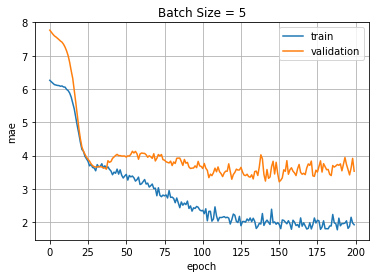

6/6 [==============================] - 0s 7ms/step - loss: 237.3060 - mae: 2.7395


[237.30599975585938, 2.7395083904266357]

In [53]:
"""
Resource 3
"""
plt.plot(history_batch5.history['mae'])
plt.plot(history_batch5.history['val_mae'])
plt.title('Batch Size = 5')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_batch5 = model_batch5.evaluate(X_test, y_test, verbose=1)
score_batch5

### Batch size = 10

In [54]:
"""
Resource 2
"""
model_batch10 = create_model(n, Adam(learning_rate = 0.0001), 0.2)

history_batch10 = model_batch10.fit(X_train,
                                    y_train,
                                    validation_split = 0.2,
                                    epochs=200,
                                    batch_size=10,
                                    verbose=1
                                   )

Epoch 1/200
59/59 [==============================] - 2s 9ms/step - loss: 916.6643 - mae: 6.2037 - val_loss: 838.8138 - val_mae: 7.6948

Epoch 00001: val_loss improved from inf to 838.81378, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 2/200
59/59 [==============================] - 0s 3ms/step - loss: 913.4346 - mae: 6.1865 - val_loss: 835.3826 - val_mae: 7.6696

Epoch 00002: val_loss improved from 838.81378 to 835.38263, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 3/200
59/59 [==============================] - 0s 3ms/step - loss: 911.3007 - mae: 6.1906 - val_loss: 831.3887 - val_mae: 7.6508

Epoch 00003: val_loss improved from 835.38263 to 831.38867, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 4/200
59/59 [==============================] - 0s 3ms/step - loss: 909.2203 - mae: 6.1931 - val_loss: 826.1530 - val_mae: 7.

59/59 [==============================] - 0s 4ms/step - loss: 356.4085 - mae: 4.0219 - val_loss: 221.3443 - val_mae: 3.9649

Epoch 00029: val_loss improved from 236.49791 to 221.34435, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 30/200
59/59 [==============================] - 0s 4ms/step - loss: 339.4797 - mae: 3.9474 - val_loss: 206.6513 - val_mae: 3.9161

Epoch 00030: val_loss improved from 221.34435 to 206.65126, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 31/200
59/59 [==============================] - 0s 5ms/step - loss: 330.2261 - mae: 3.9677 - val_loss: 195.3047 - val_mae: 3.8800

Epoch 00031: val_loss improved from 206.65126 to 195.30472, saving model to validation_loss_m2
INFO:tensorflow:Assets written to: validation_loss_m2\assets
Epoch 32/200
59/59 [==============================] - 0s 6ms/step - loss: 310.5176 - mae: 3.8385 - val_loss: 190.0845 - val_mae: 3.820

59/59 [==============================] - 0s 4ms/step - loss: 152.7930 - mae: 3.2115 - val_loss: 178.3359 - val_mae: 3.8584

Epoch 00067: val_loss did not improve from 173.11330
Epoch 68/200
59/59 [==============================] - 0s 4ms/step - loss: 140.9560 - mae: 3.0924 - val_loss: 183.8954 - val_mae: 3.9277

Epoch 00068: val_loss did not improve from 173.11330
Epoch 69/200
59/59 [==============================] - 0s 4ms/step - loss: 166.8546 - mae: 3.3672 - val_loss: 179.2337 - val_mae: 3.8773

Epoch 00069: val_loss did not improve from 173.11330
Epoch 70/200
59/59 [==============================] - 0s 4ms/step - loss: 182.9657 - mae: 3.2365 - val_loss: 186.5112 - val_mae: 3.9617

Epoch 00070: val_loss did not improve from 173.11330
Epoch 71/200
59/59 [==============================] - 0s 4ms/step - loss: 163.0905 - mae: 3.1939 - val_loss: 180.1365 - val_mae: 3.8920

Epoch 00071: val_loss did not improve from 173.11330
Epoch 72/200
59/59 [==============================] - 0s 4ms/st

59/59 [==============================] - 0s 5ms/step - loss: 147.8085 - mae: 2.7976 - val_loss: 179.8366 - val_mae: 3.6257

Epoch 00107: val_loss did not improve from 159.84439
Epoch 108/200
59/59 [==============================] - 0s 5ms/step - loss: 111.1237 - mae: 2.6527 - val_loss: 170.7530 - val_mae: 3.5335

Epoch 00108: val_loss did not improve from 159.84439
Epoch 109/200
59/59 [==============================] - 0s 3ms/step - loss: 91.0733 - mae: 2.5214 - val_loss: 174.9673 - val_mae: 3.5600

Epoch 00109: val_loss did not improve from 159.84439
Epoch 110/200
59/59 [==============================] - 0s 4ms/step - loss: 92.8581 - mae: 2.5422 - val_loss: 169.9138 - val_mae: 3.5056

Epoch 00110: val_loss did not improve from 159.84439
Epoch 111/200
59/59 [==============================] - 0s 4ms/step - loss: 73.4731 - mae: 2.3373 - val_loss: 183.1720 - val_mae: 3.6164

Epoch 00111: val_loss did not improve from 159.84439
Epoch 112/200
59/59 [==============================] - 0s 4ms/

59/59 [==============================] - 0s 4ms/step - loss: 37.2423 - mae: 1.8500 - val_loss: 293.2176 - val_mae: 3.5689

Epoch 00192: val_loss did not improve from 154.49077
Epoch 193/200
59/59 [==============================] - 0s 4ms/step - loss: 40.9931 - mae: 1.8634 - val_loss: 299.5441 - val_mae: 3.6040

Epoch 00193: val_loss did not improve from 154.49077
Epoch 194/200
59/59 [==============================] - 0s 4ms/step - loss: 42.4799 - mae: 1.8775 - val_loss: 307.7007 - val_mae: 3.6434

Epoch 00194: val_loss did not improve from 154.49077
Epoch 195/200
59/59 [==============================] - 0s 4ms/step - loss: 38.5285 - mae: 1.9071 - val_loss: 300.0396 - val_mae: 3.5965

Epoch 00195: val_loss did not improve from 154.49077
Epoch 196/200
59/59 [==============================] - 0s 4ms/step - loss: 37.9902 - mae: 1.8708 - val_loss: 314.4959 - val_mae: 3.6948

Epoch 00196: val_loss did not improve from 154.49077
Epoch 197/200
59/59 [==============================] - 0s 4ms/st

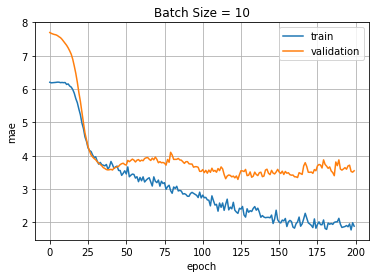

6/6 [==============================] - 0s 6ms/step - loss: 197.4536 - mae: 2.7248


[197.45359802246094, 2.724822759628296]

In [55]:
"""
Resource 3
"""
plt.plot(history_batch10.history['mae'])
plt.plot(history_batch10.history['val_mae'])
plt.title('Batch Size = 10')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim(top = 8)
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

score_batch10 = model_batch10.evaluate(X_test, y_test, verbose=1)
score_batch10

### Comparison of Batch Sizes

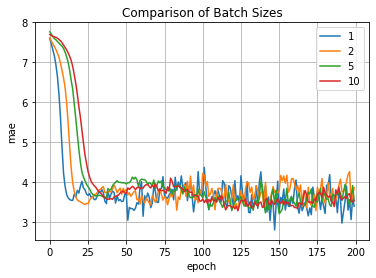

1 2.1908044815063477
2 2.35498046875
5 2.7395083904266357
10 2.724822759628296


In [56]:
plt.plot(history_batch1.history['val_mae'])
plt.plot(history_batch2.history['val_mae'])
plt.plot(history_batch5.history['val_mae'])
plt.plot(history_batch10.history['val_mae'])

plt.title('Comparison of Batch Sizes')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['1', '2', '5', '10'], loc='upper right')
plt.ylim(top = 8)
plt.grid()
plt.show()

print('1', score_batch1[1])
print('2', score_batch2[1])
print('5', score_batch5[1])
print('10', score_batch10[1])

Resources:
1. Keras Sequential model: https://keras.io/guides/sequential_model/
2. Train model: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
3. Display model training history: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/